In [1]:
import pandas as pd

In [22]:
#patients = pd.read_csv("../data/raw/train.csv", index_col='id')
p_01 = pd.read_csv("../data/interim/p01_train.csv")
p_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26133 entries, 0 to 26132
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  26133 non-null  object 
 1   p_num     26133 non-null  object 
 2   bg        8460 non-null   float64
 3   insulin   26082 non-null  float64
 4   carbs     423 non-null    float64
 5   hr        24681 non-null  float64
 6   steps     18089 non-null  float64
 7   cals      25856 non-null  float64
 8   activity  1042 non-null   object 
 9   bg+1:00   8459 non-null   float64
dtypes: float64(7), object(3)
memory usage: 2.0+ MB


In [23]:
p_01.head()

,datetime,p_num,bg,insulin,carbs,hr,steps,cals,activity,bg+1:00
0,2020-01-01 06:10:00,p01,15.1,0.0417,NaN,NaN,NaN,NaN,NaN,13.4
1,2020-01-01 06:15:00,p01,NaN,0.0417,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 06:20:00,p01,NaN,0.0417,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 06:25:00,p01,14.4,0.0417,NaN,NaN,NaN,NaN,NaN,12.8
4,2020-01-01 06:30:00,p01,NaN,0.0417,NaN,NaN,NaN,NaN,NaN,NaN


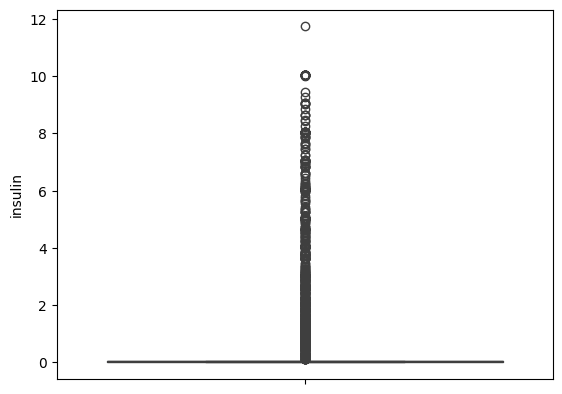

In [26]:
import seaborn as sns

sns.boxplot(p_01['insulin']);

In [27]:
Q1 = p_01['insulin'].quantile(0.25)
Q3 = p_01['insulin'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)
# Get outliers
outliers_insulin = p_01[(p_01['insulin'] < lower_bound) | (p_01['insulin'] > upper_bound)]['insulin']
print("insulin_outliers:", outliers_insulin.values)

-0.014449999999999994 0.10194999999999999
-0.014449999999999994 0.10194999999999999
insulin_outliers: [ 6.5417  2.6583  1.0583  3.15    1.8292  5.8292  1.0333  0.6333  0.9167
  0.2167  1.7083  0.2417  8.0583  1.0583  8.05    4.05   10.0292  4.3583
  6.8292  1.4292  2.2083  3.25    2.55    4.05    6.0333  0.8083  0.1417
  3.0417  1.6583  0.85    4.05    2.65    2.4292  3.0333  0.6167  1.3417
  7.4583  6.85    8.0333 10.0333  0.3167  4.4266  7.0583  6.2583  6.0292
  0.9333  0.2167  0.5083  4.5083 10.0583  1.8583  6.9292  6.0292  4.0292
  7.2583  2.0583  8.6292  8.6292  0.8333  3.0583  8.05    6.0292  3.6167
  3.6167  2.0083  3.0083  7.8583  1.25    1.15    0.7292  4.6292  4.2333
  3.6167  1.2417  3.0583  2.0583  0.8128  3.35    4.0292  1.4333  1.8333
  1.8106  1.5083  0.5083  5.0083  7.0583  1.05    4.0292  4.0292  5.0333
  2.0167  1.7167  3.8417  1.0417  1.6583  5.0583  7.0292  2.4292  5.4167
  7.0583  3.2583  6.0292  4.4292  2.2333  4.0583  8.0583  2.05    0.9292
  8.0292  2.8333  1.51

In [31]:
p_01['insulin'].describe()

count    26082.000000
mean         0.132587
std          0.706060
min          0.000000
25%          0.029200
50%          0.036950
75%          0.058300
max         11.741700
Name: insulin, dtype: float64

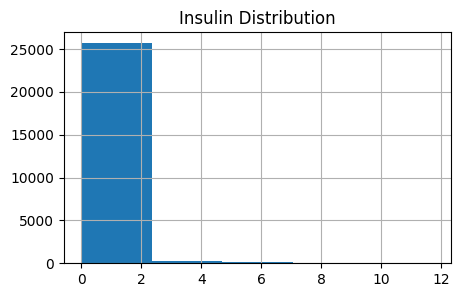

In [41]:
import matplotlib.pyplot as plt

# Plot original distribution
plt.figure(figsize=(5, 3))
p_01['insulin'].hist(bins=5)
plt.title('Insulin Distribution')
plt.show()

QQ-Plot for bg
QQ-Plot for insulin
QQ-Plot for carbs
QQ-Plot for hr
QQ-Plot for steps
QQ-Plot for cals
QQ-Plot for bg+1:00


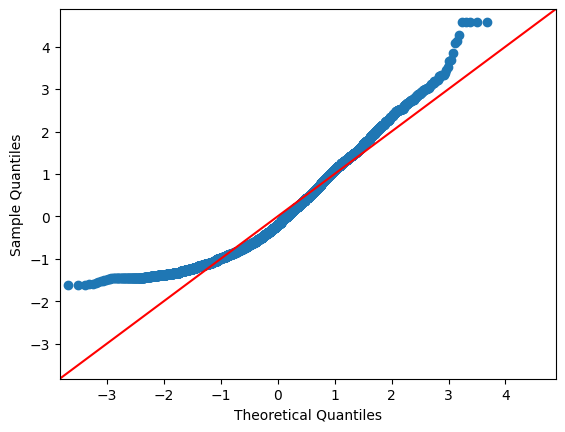

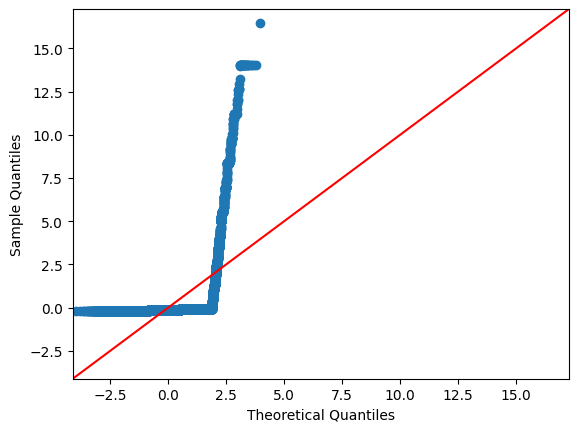

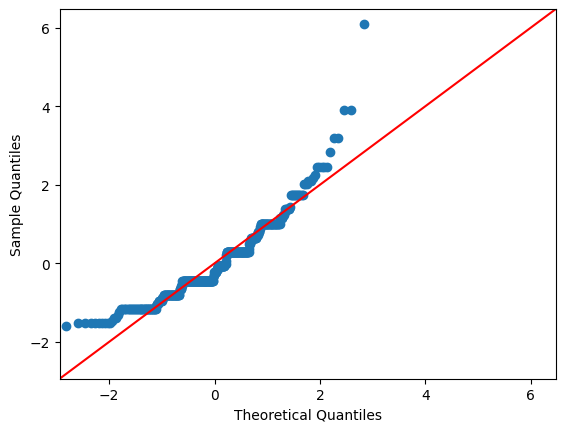

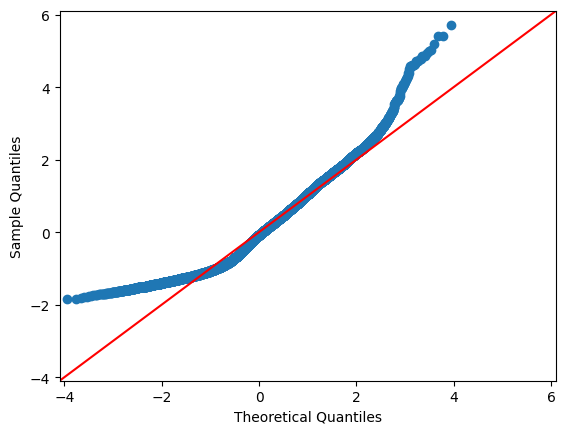

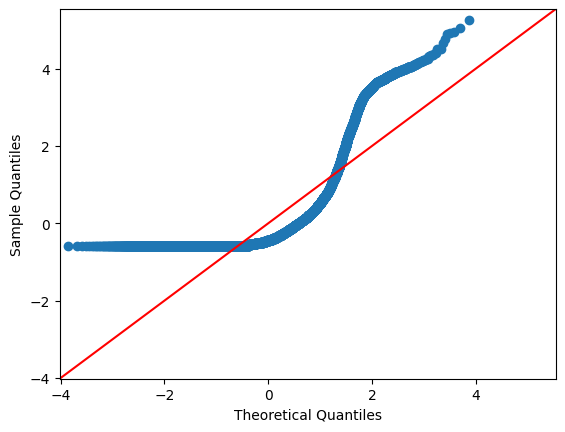

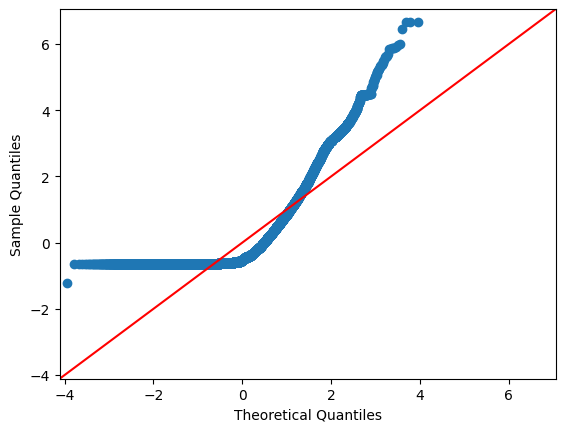

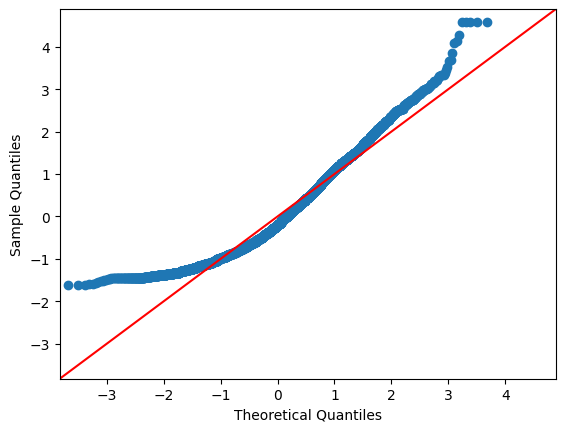

In [37]:
import statsmodels.api as sm
import numpy as np

# Select numeric columns
var_num = p_01.select_dtypes(include=['float'])

for col in var_num.columns:
    # Remove non-finite values (NaN and infinite values)
    finite_data = var_num[col][np.isfinite(var_num[col])]
    print(f"QQ-Plot for {col}")    
    sm.qqplot(finite_data, fit=True, line='45')